In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
%matplotlib inline
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")



Bad key "text.kerning_factor" on line 4 in
/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
df = pd.read_csv('dengue_features_train.csv')

In [4]:
d = {'station': 'stn', 'reanalysis': 're_an','humidity': 'hd','precipitation':'prec'}

def replace_all(text, dic):
    for i, j in dic.items():
        text.columns = text.columns.str.replace(i, j)
    return text

replace_all(df,d)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_precip_amt_kg_per_m2,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [5]:
df.year = df.year.astype('category')

In [6]:
lb = pd.read_csv('dengue_labels_train.csv')

In [7]:
lb.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [8]:
lb.year = lb.year.astype('category')

In [9]:
df_merged = df.merge(lb,on=['city','year','weekofyear'],how='inner')

In [10]:
df_merged

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,prec_amt_mm,re_an_air_temp_k,...,re_an_relative_hd_percent,re_an_sat_precip_amt_mm,re_an_specific_hd_g_per_kg,re_an_tdtr_k,stn_avg_temp_c,stn_diur_temp_rng_c,stn_max_temp_c,stn_min_temp_c,stn_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [11]:
df_filledna = df_merged.fillna(method='ffill',inplace=True)

In [12]:
df_merged["total_cases"] = df_merged["total_cases"].astype('float64')

In [13]:
X = df_merged.drop('total_cases',axis=1)
y = df_merged['total_cases']

# 1. Make an 80-20 stratified split based on the target data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y

0       4.0
1       5.0
2       4.0
3       3.0
4       6.0
       ... 
1451    5.0
1452    8.0
1453    1.0
1454    1.0
1455    4.0
Name: total_cases, Length: 1456, dtype: float64

In [16]:
y.value_counts()

0.0      100
6.0       71
5.0       70
3.0       70
2.0       69
        ... 
131.0      1
149.0      1
329.0      1
169.0      1
333.0      1
Name: total_cases, Length: 135, dtype: int64

In order to use stratify sampling, will need to remove the y values where the frequency is 1.  
Otherwise we get following error:  

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

https://github.com/davidsbatista/text-classification/issues/1

In [17]:
# Removing the reords which do not have frequency greater than 1
df_merged.drop( ['week_start_date'],1,inplace=True)
df_merged =  df_merged.groupby('total_cases').filter(lambda x: len(x) > 1)

X = df_merged.drop('total_cases',axis=1)
y = df_merged['total_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20)

In [18]:
type(X_train)

pandas.core.frame.DataFrame

In [20]:
y.value_counts()

0.0      100
6.0       71
5.0       70
3.0       70
2.0       69
        ... 
82.0       2
106.0      2
129.0      2
85.0       2
116.0      2
Name: total_cases, Length: 88, dtype: int64

# 2. Preprocess the data (Encode the categorical features and Standardize the numerical features)

In [21]:
cat_feature = ["city", 'year']
#convert the attributes to categorical form
for i in cat_feature:
    X_train[i] = X_train[i].astype("category")
    X_test[i] = X_test[i].astype("category")

#Convert categorical variable into dummy/indicator variables
X_train_temp = pd.get_dummies(X_train[['city','year']])
X_test_temp = pd.get_dummies(X_test[['city','year']])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [22]:
type(X_test_temp)

pandas.core.frame.DataFrame

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#Applying the StandardScaler to all the numerical data
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['city', 'year']))
new_X_train = np.concatenate((X_train_scaled,np.array(X_train_temp)),axis=1)
               
X_test_scaled = scaler.transform(X_test.drop(columns=['city', 'year']))
new_X_test = np.concatenate((X_test_scaled,np.array(X_test_temp)),axis=1)

In [24]:
type(new_X_test)

numpy.ndarray

# Build a stochastic gradient descent regressor, train the model 

In [20]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(new_X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

# Evaluate your model based on applicable metrics. Show the metric(s) you chose and why you chose this(these) metrics.

In [21]:
y_predict = sgd_reg.predict(new_X_test)

In [22]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_predict)
mae

11.340553228835818

# Analysis: 

Since, we don't want out model to be error is not that sensitive to outliers, using MAE makes sense so that it doesn't penalize huge errors.

# List the hyper-parameters that can be tuned in SGD. Show the code along with comments on the parameter value chosen 


In [39]:
sgd_reg_1 = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42,early_stopping=True )
sgd_reg_1.fit(new_X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [40]:
y_predict_1 = sgd_reg_1.predict(new_X_test)

In [41]:
mean_absolute_error(y_test, y_predict_1)

11.660748412916734

# Analysis

For the first model, I have used the basic hyperparamets.   
max_iter = 1000  
Learning rate = 0.0001  
Early_stopping = True   

In [43]:
sgd_reg_2 = SGDRegressor(max_iter=5000, tol=1e-3, random_state=42,early_stopping=True,penalty='l1' )
sgd_reg_2.fit(new_X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=5000,
             n_iter_no_change=5, penalty='l1', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [44]:
y_predict_2 = sgd_reg_2.predict(new_X_test)

In [45]:
mean_absolute_error(y_test, y_predict_2)

11.660667095499635

# Analysis:

For this, model, I added loss='huber' along with penalty='l1' But using Huber loss fuction, increases the error. 
As we can see, using  penalty='l2'or  penalty='l1' doesn't make any difference on the absolute Error. 

In [46]:
sgd_reg_4 = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42 , penalty=None)
sgd_reg_4.fit(new_X_train,y_train)
y_predict_4 = sgd_reg_4.predict(new_X_test)
mean_absolute_error(y_test, y_predict_4)

11.341998854816056

# Analysis:

If we don't penalize the model, the error is decreasesing but it's safe to penalize the model so that it doesn't overfit. 

# Plot Learning curve and provide insights

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_mo

Text(0, 0.5, 'MAE')

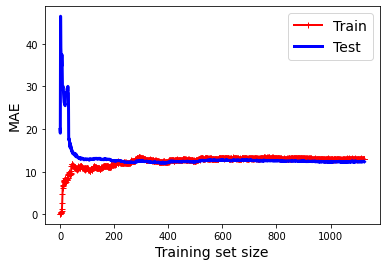

In [30]:
train_errors, test_errors = [], []
for m in range(1, len(new_X_train)):
    sgd_reg.fit(X_train_scaled[:m], y_train[:m])
    y_train_predict = sgd_reg.predict(X_train_scaled[:m])
    y_test_predict = sgd_reg.predict(X_test_scaled)
    train_errors.append(mean_absolute_error(y_train[:m], y_train_predict))
    test_errors.append(mean_absolute_error(y_test, y_test_predict))
plt.plot(train_errors, "r+-", linewidth=2, label = "Train")
plt.plot(test_errors, "b-", linewidth=3, label = "Test")
plt.legend(loc="upper right", fontsize=14) 
plt.xlabel("Training set size", fontsize=14)
plt.ylabel("MAE", fontsize=14)


# Analysis

We can see that after test size of 200 it has flattern. i.e. training set doesn’t make the average error much better or worse. Looking at the Test MAE, after a point it is lower than the train MAE  
This can happen in the following cases:  
1. It is possible when you have not sampled the data or split the test train data perfectly.  
2. It is possible when your test data is small and its not a good representative of train data, then there may or may    not be a case when for that test data it behaves good and gives low error.  
3. There can be a case when you use regularization and your train data move away from overfitting i.e. increased        train error but generalizing good on test data i.e. low train error.  

Source: StackOverflow

In [33]:
output =  {"city" : X_test["city"],
           "year" : X_test["year"],
           "weekofyear" : X_test["weekofyear"],
           "pred" : y_predict_2}

df = pd.DataFrame(output, columns= ['city', 'year','weekofyear','pred'])

df.to_csv (r'export_dataframe.csv', index = False, header=True)

df

,city,year,weekofyear,pred
921,sj,2008,3,16.435167
168,sj,1993,29,28.590932
9,sj,1990,27,29.216370
1404,iq,2009,27,5.342592
1422,iq,2009,45,13.670097
...,...,...,...,...
296,sj,1996,2,14.275543
918,sj,2007,52,33.724722
1052,iq,2002,39,4.765269
1151,iq,2004,34,1.489343
